<a href="https://colab.research.google.com/github/raquel-maia/python-dados/blob/main/Testes_de_Hip%C3%B3teses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 #### importando os pacotes\n
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## TESTE QUI-QUADRADO PARA ASSOCIAÇOES DE VARIAVEIS CATEGORICAS

medir associação do genero e tipo de veiculo

In [ ]:
from tabulate import tabulate #faz tabelas

t=[['Male', 'Car'],
      ['Male', 'Car'],
      ['Male', 'Motorcycle'],
      ['Female', 'Car'],
      ['Female', 'Bike']]

print(tabulate(t, headers= ['Gender','Vehicle'], tablefmt = 'fancy_grid', stralign='center', numalign='center', floatfmt=".2f"))

╒══════════╤════════════╕
│  Gender  │  Vehicle   │
╞══════════╪════════════╡
│   Male   │    Car     │
├──────────┼────────────┤
│   Male   │    Car     │
├──────────┼────────────┤
│   Male   │ Motorcycle │
├──────────┼────────────┤
│  Female  │    Car     │
├──────────┼────────────┤
│  Female  │    Bike    │
╘══════════╧════════════╛


1 - Criando a tabela de contingÇencia (tabela de frequencia): supondo que tenha feito uma pesquisa com varios homens e mulheres e 9 homens preferiam carros....

In [ ]:
print(tabulate([['Male',9,18,28], ['Female',5,8,15]],
                      headers = ['Car', 'Motorcycle', 'Bike'],
                      tablefmt = 'fancy_grid',stralign='center',
                      numalign='center',
                      floatfmt=".2f"))

╒════════╤═══════╤══════════════╤════════╕
│        │  Car  │  Motorcycle  │  Bike  │
╞════════╪═══════╪══════════════╪════════╡
│  Male  │   9   │      18      │   28   │
├────────┼───────┼──────────────┼────────┤
│ Female │   5   │      8       │   15   │
╘════════╧═══════╧══════════════╧════════╛


<Axes: >

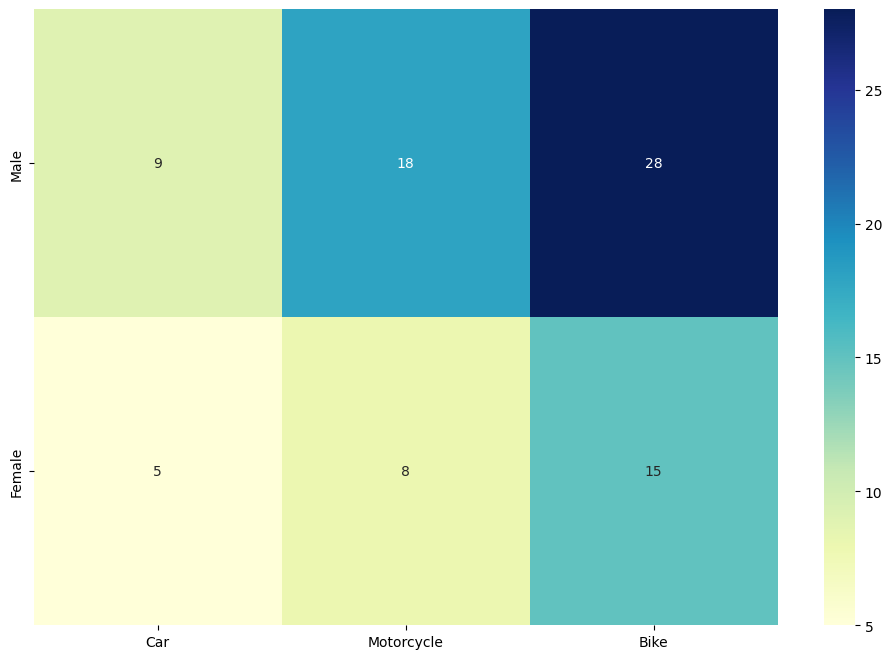

In [ ]:
#plot da tabela com cores

table = [[9, 18, 28],
         [5,  8,  15]]

plt.figure(figsize=(12,8))
x_axis_labels = ['Car', 'Motorcycle','Bike']
y_axis_labels = ['Male', 'Female']
sns.heatmap(table, annot=True, cmap="YlGnBu",xticklabels=x_axis_labels, yticklabels=y_axis_labels)

Formula Hipótese:

H0 : As variaveis nao tem grau de associacao

HA : As variaveis possuem grau de associacao

Nivel de significancia, alpha = 0.05 (5%)



In [ ]:
#3 RODANDO O TESTE
from scipy.stats import chi2_contingency
from scipy.stats import chi2

estatistica, pvalor, df, expected = chi2_contingency(table)

alpha = 0.05

print (pvalor) #esse valor é alto

if pvalor <= alpha:
  print('Depedentes {rejeita H0}')
else:
   print('Depedentes {não rejeita H0}') #podemos dizer que não existe associacao por genero de carro

0.9267147440706386
Depedentes {não rejeita H0}


TESTE ANOVA ( A GENTE VERIFICA SE A MEDIA DE DIFERENTE GRUPOS É DIFERENTE) Vamos realizar um teste ANOVA para mEdia de idade de diferentes regioes de clientes de determinada rede de farmacias

In [ ]:
import scipy.stats as stats
np.random.seed(12)

regioes =   ["sul","sudeste","centro_oeste","norte","nordeste"]

# gerando dados aleatorios com pytho

consum_reg = np.random.choice(a= regioes,
                                p = [0.05, 0.15 ,0.25, 0.05, 0.5],
                                size=1000)

consum_idade = stats.poisson.rvs(loc=18,
                              mu=30,
                              size=1000)

In [ ]:
# agrupando os dados por regiao\
consum_frame = pd.DataFrame({"reg":consum_reg,"idade":consum_idade})
groupos = consum_frame.groupby("reg").groups

# extraindo a idade de cada um dos grupos
sul = consum_idade[groupos["sul"]]
sudeste = consum_idade[groupos["sudeste"]]
centro_oeste = consum_idade[groupos["centro_oeste"]]
norte = consum_idade[groupos["norte"]]
nordeste = consum_idade[groupos["nordeste"]]

# Perform the ANOVA
stats.f_oneway(sul, sudeste, centro_oeste, norte, nordeste) # o valor da estatica e o p-valor


F_onewayResult(statistic=1.7744689357329695, pvalue=0.13173183201930463)

Como o hipotese nula do teste é de que nao ha diferenca entre os grupos,

como o p-valor é maior que 0.05 nao podemos rejeitar H0, e entao nao há diferenca entre os grupos estatisticamente diferente" então a idade é mais ou menos proxima


TESTE KS -  O QUÃO DISTANTE ESTÁ DE OUTRA DISTRIBUIÇÃO AMOSTRAL

<ipython-input-39-a52c0aaff62b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rvs).set_title("Exemplo: Distribuição Normal")


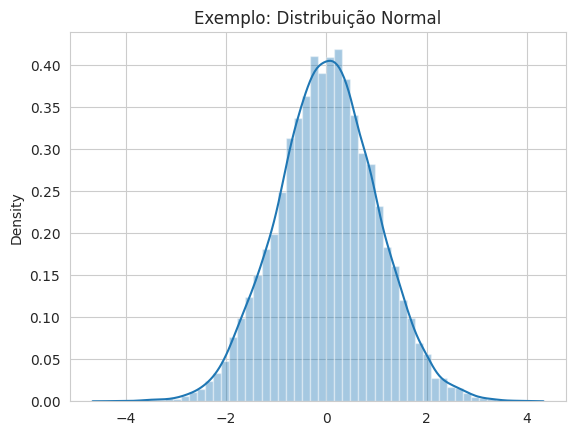

In [ ]:
# Generando 10000 pontos de uma distribuicao

rvs = stats.norm.rvs(size=10000)
sns.set_style('whitegrid')
#sns.kdeplot(rvs)
sns.distplot(rvs).set_title("Exemplo: Distribuição Normal")
plt.show()

odando um teste KS para comparar os dados gerados com uma distribuição normal com o teste KS

In [ ]:
stats.kstest(rvs=rvs, cdf='norm')

KstestResult(statistic=0.01062941229857281, pvalue=0.20705988592690194, statistic_location=-0.7976755006767643, statistic_sign=-1)

A hipótese nula do teste é de que a distribuição dos dados segue a mesma da distribuição  de referencia.
Sendo assim como o pvalor é maior que 0.05, temos para um nivel de significancia de 5%, nao podemos rejeitar a hipotese nula

<ipython-input-41-7924f556c2f7>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(consum_idade).set_title("Exemplo: Distribuição idade, poisson")


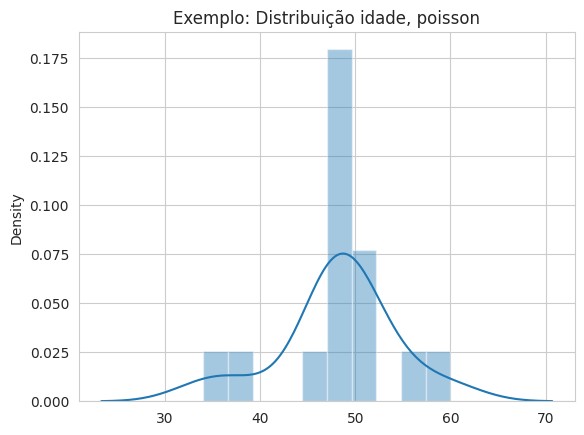

In [ ]:
### Vamos rodar o mesmo teste agora para a variavel idade gerada com a distribuicao de poisson no teste anterior
consum_idade = stats.poisson.rvs(loc=18,
                                 mu=30,
                                 size=15)
sns.distplot(consum_idade).set_title("Exemplo: Distribuição idade, poisson")
plt.show()


In [ ]:
### roda o teste ks
stats.kstest(rvs=consum_idade, cdf='norm')

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=34, statistic_sign=-1)

hipÃ³tese nula do teste é de que a distribuição dos dados segue a mesma da distribuição de referencia. Sendo assim como o pvalor Ã© menor que 0.05, temos para um nivel de significancia de 5%, rejeitamos a hipotese nula, e o dado nao segue a distribuicao normal pelo teste

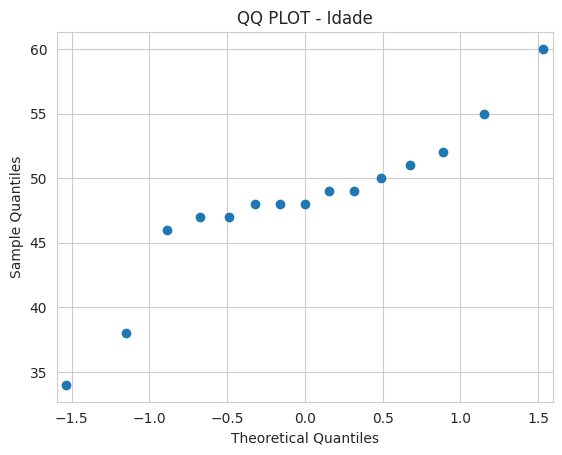

In [ ]:
### QQ PLOTS
import statsmodels.api as sm
sm.qqplot(consum_idade)
plt.title("QQ PLOT - Idade")
plt.show()

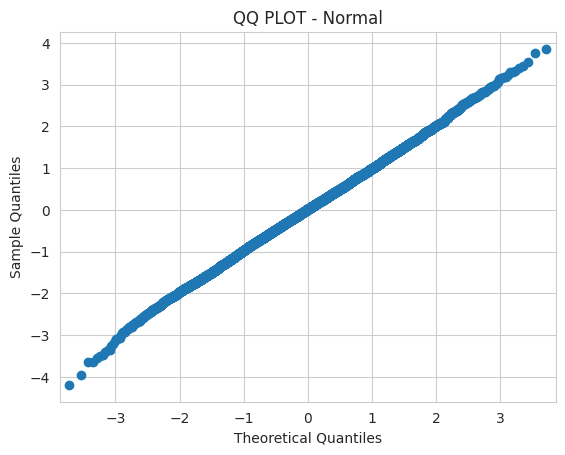

In [ ]:
sm.qqplot(rvs)
plt.title("QQ PLOT - Normal")
plt.show()